In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import make_blobs

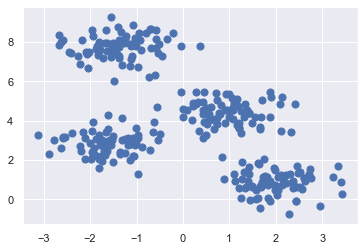

In [14]:
X ,y_true = make_blobs(n_samples =300, centers =4,cluster_std =0.6,random_state =0)
plt.scatter(X[:,0],X[:,1]  ,s =50)

In [15]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters =4)

In [18]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [19]:
y_kmeans = kmeans.predict(X)


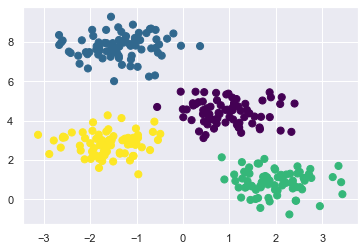

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')


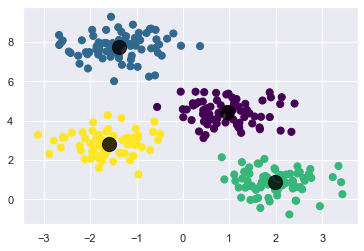

In [24]:
plt.scatter(X[:,0],X[:,1], c = y_kmeans, s =50 ,cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8);


## k-Means Algorithm: Expectation–Maximization

#### Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety \nof contexts within data science. k-means is a particularly simple and easy-tounderstand application of the algorithm,\n and we will walk through it\n briefly here. Inshort, the expectation–maximization approach consists of the following procedure:

In [25]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

#### k-means is limited to linear cluster boundaries

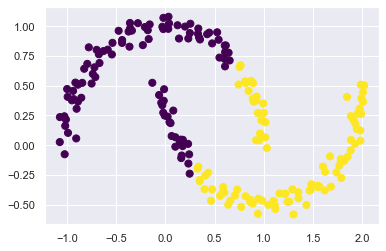

In [26]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');


##### Failure of k-means with nonlinear boundaries

### One version of this kernelized k-means is implemented in Scikit-Learn within the SpectralClustering estimator

###### It uses the graph of nearest neighbors to com‐pute a higher-dimensional representation of the data, and then assigns labelsusing a k-means algorithm

In [28]:
from sklearn.cluster import SpectralClustering



In [29]:
model = SpectralClustering(n_clusters =2 , affinity = 'nearest_neighbors', assign_labels = 'kmeans')

In [31]:
labels = model.fit_predict(X)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


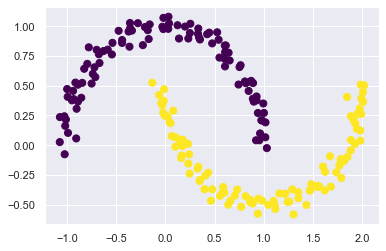

In [33]:
plt.scatter(X[:,0],X[:,1], c = labels , s =50 ,cmap = 'viridis')

#### We see that with this kernel transform approach, the kernelized k-means is able to find the more complicated nonlinear boundaries between clusters.

## k-means for color compression

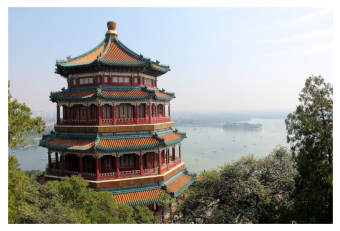

In [34]:
# Note: this requires the pillow package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);


In [35]:
china.shape

(427, 640, 3)

##### s in a three-dimensionalcolor space. We will reshape the data to [n_samples x n_features], and rescale thecolors so that they lie between 0 and 1:


In [36]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [37]:
def plot_pixels(data, title, colors=None, N=10000):
                if colors is None:
                       colors = data
 # choose a random subset
                rng = np.random.RandomState(0)
                i = rng.permutation(data.shape[0])[:N]
                colors = colors[i]
                R, G, B = data[i].T
                fig, ax = plt.subplots(1, 2, figsize=(16, 6))
                ax[0].scatter(R, G, color=colors, marker='.')
                ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
                ax[1].scatter(R, B, color=colors, marker='.')
                ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
                fig.suptitle(title, size=20);

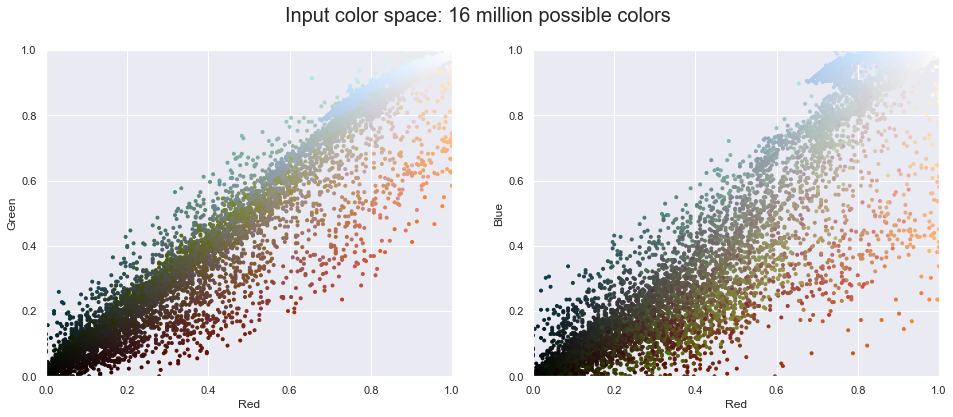

In [38]:
plot_pixels(data, title='Input color space: 16 million possible colors')


C:\Users\91808\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


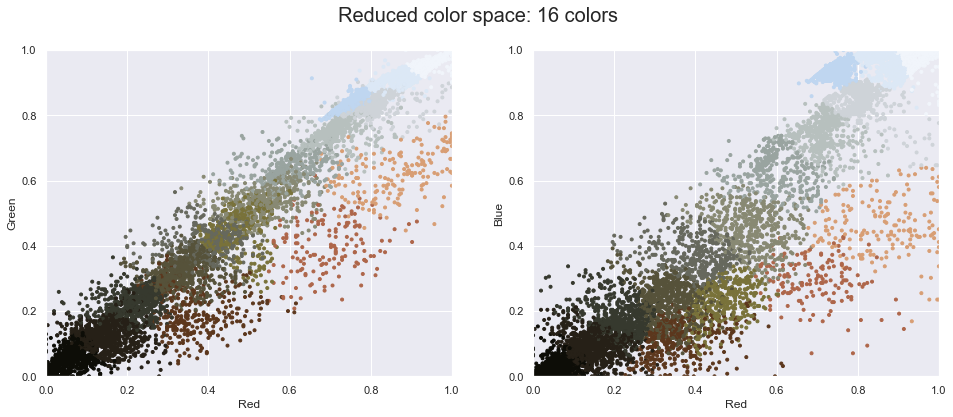

In [40]:
#reduce these 16 million colors to just 16 colors, using a k-means clustering
#across the pixel space
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors,
title="Reduced color space: 16 colors")


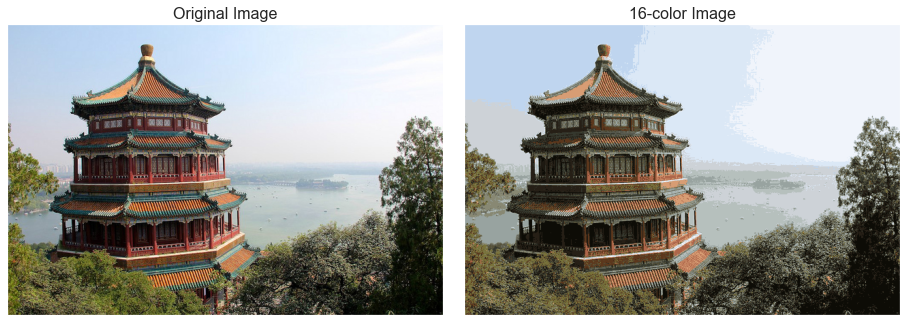

In [41]:
## 16 million to 16 color
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
          subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);